# BACKGROUND

Seorang pengusaha ingin membangun penginapan baru di wilayah kota Bangkok.  Untuk memulai pembangunan dia meminta analisa kriteria yang diperlukan terhadap perencananaan yang matang. Agar nanti diharapkan penginapan banyak diminati dan menghasilkan keuntungan besar 

# PROBLEM STATEMENTS
Tujuan dari analisis ini adalah untuk memahami karakteriktik penginapan yang diminati pada properti Airbnb di Bangkok. Pertanyaan yang ingin dijawab termasuk:

* Bagaimana pengaruh `availablity_365` terhadap minat penyewaan pelanggan ?
* Apa saja faktor yang mempengaruhi penentuan kriteria perencanaan penginapan ?


# Data Understanding
Untuk menjawab pertanyaan di atas, kita akan menganalisa data listing Airbnb di Bangkok yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF?usp=drive_link).

Dataset ini berisi informasi tentang properti Airbnb di Bangkok. Ada 16 kolom dan 15.854 entri di dalam dataset Airbnb_Listings_Bangkok, yaitu:
* id : Identitas unik dari Airbnb
* name : nama properti
* host_id : id pemilik
* host_name : nama pemilik
* neighborhood  :Lingkungan lokasi
* latitude : garis lintang
* longitude : garis bujur
* room_type  : jenis kamar (Keseluruhan rumah/apartemen,Privat, Shared,Hotel)
* price : harga per malam
* minimum_nights :jumlah minimal malam yg sewa
* number_of_reviews  : jumlah ulasan
* last_review : ulasan terakhir
* calculated_host_listings_count  : jumlah properti yang dimiliki host
* availability_365  :ketersediaan selama 365 hari
* number_of_reviews_ltm  : jumlah ulasan dalam 12 bulan terakhir

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('Airbnb_Listings_Bangkok.csv').drop('Unnamed: 0', axis = 1)
display(df.head(),df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [4]:
# info umum
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064

## Missing Values

In [5]:
# Jumlah data kosong (NaN) untuk setiap variable
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing

,jumlah,persentase %
last_review,5790,36.52
reviews_per_month,5790,36.52
name,8,0.05
host_name,1,0.01
id,0,0.00
host_id,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00
room_type,0,0.00


In [6]:
pip install missingno

<Axes: >

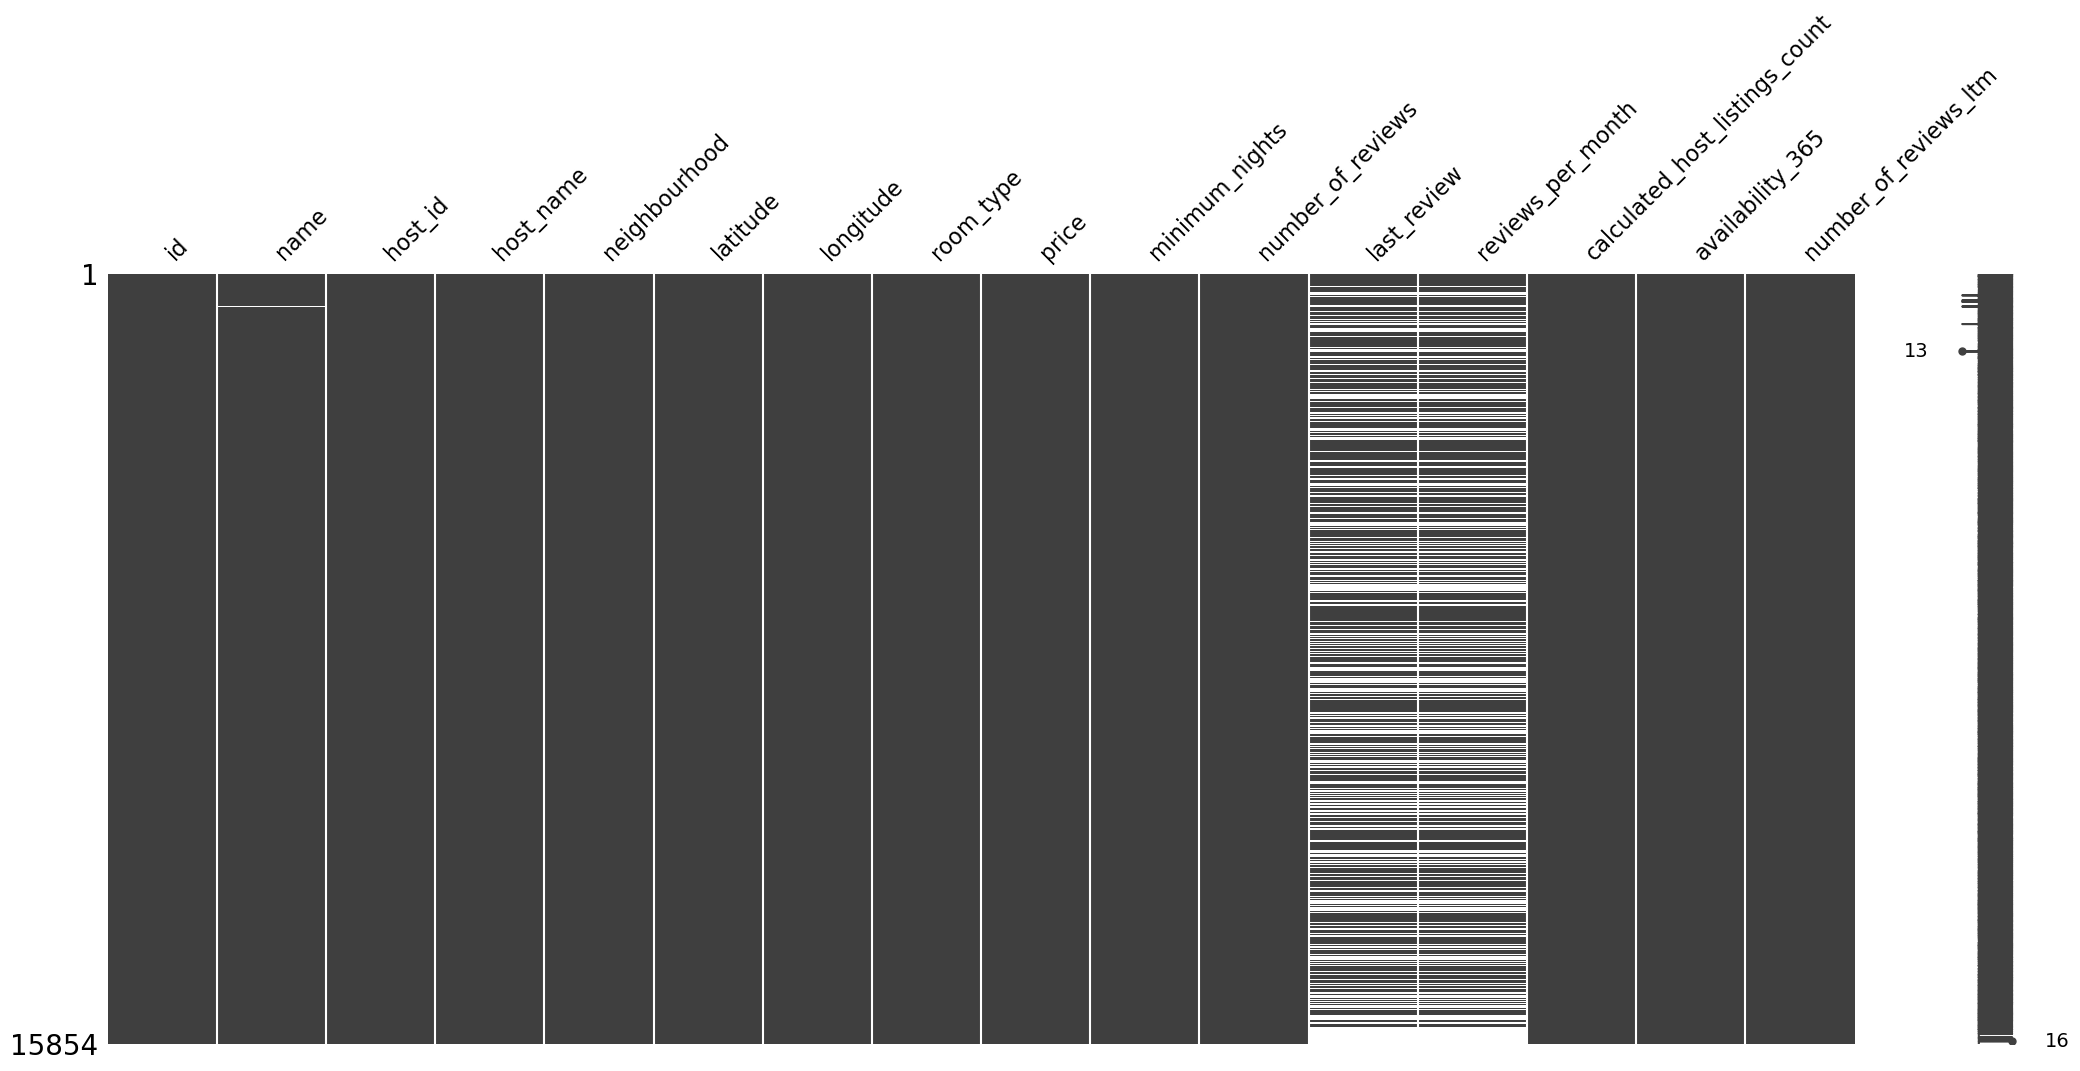

In [7]:
import missingno as msno 
msno.matrix(df)

In [8]:
# Melihat data kosong 
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Secara umum, kita bisa melihat bahwa:
* Ada 16 kolom dan 15.854 entri di dalam dataset Airbnb_Listings_Bangkok
* beberapa kolom, yaitu, `name`, `last_review`, `reviews_per_month`,  dan `host_name` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Kolom pada `last_review` dan `reviews_per_month` terlihat saling berkaitan. Sehingga dapat diasumsikan jika data pada `last_review` kosong maka belum ada ulasan sehingga pada jumlah pada `reviews_per_month` juga kosong atau 0

## Data Duplicate

In [9]:
# jumlah yang duplikat
df.duplicated().sum()

0

Setelah dilakukan pengecakan tidak terdapat data duplikat.

## Variable Numerik

Langkah berikutnya dicoba pengecekan data distribusi pada variable Numerik dengan statistika deskriptif,pengecekan outlier, dan Korelasi

### Statistika Deskriptif

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15854.0,1.579397e+17,2.946015e+17,27934.00000,2.104509e+07,3.503734e+07,5.256154e+07,7.908162e+17
host_id,15854.0,1.541058e+08,1.318726e+08,58920.00000,3.974431e+07,1.224556e+08,2.390547e+08,4.926659e+08
latitude,15854.0,1.374514e+01,4.303957e-02,13.52730,1.372009e+01,1.373849e+01,1.375950e+01,1.395354e+01
longitude,15854.0,1.005599e+02,5.091058e-02,100.32955,1.005297e+02,1.005614e+02,1.005851e+02,1.009234e+02
price,15854.0,3.217704e+03,2.497212e+04,0.00000,9.000000e+02,1.429000e+03,2.429000e+03,1.100000e+06
minimum_nights,15854.0,1.529236e+01,5.081502e+01,1.00000,1.000000e+00,1.000000e+00,7.000000e+00,1.125000e+03
number_of_reviews,15854.0,1.665416e+01,4.061333e+01,0.00000,0.000000e+00,2.000000e+00,1.300000e+01,1.224000e+03
reviews_per_month,10064.0,8.131449e-01,1.090196e+00,0.01000,1.200000e-01,4.350000e-01,1.060000e+00,1.913000e+01
calculated_host_listings_count,15854.0,1.388962e+01,3.026985e+01,1.00000,1.000000e+00,4.000000e+00,1.300000e+01,2.280000e+02
availability_365,15854.0,2.443786e+02,1.258432e+02,0.00000,1.380000e+02,3.090000e+02,3.600000e+02,3.650000e+02


secara decripsi kita dapat ketahui terdapat nilai count, mean, standar deviasi, min, max, median pada 11 data numerik

#### Grafik Histogram

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\wenda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wenda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wenda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wenda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

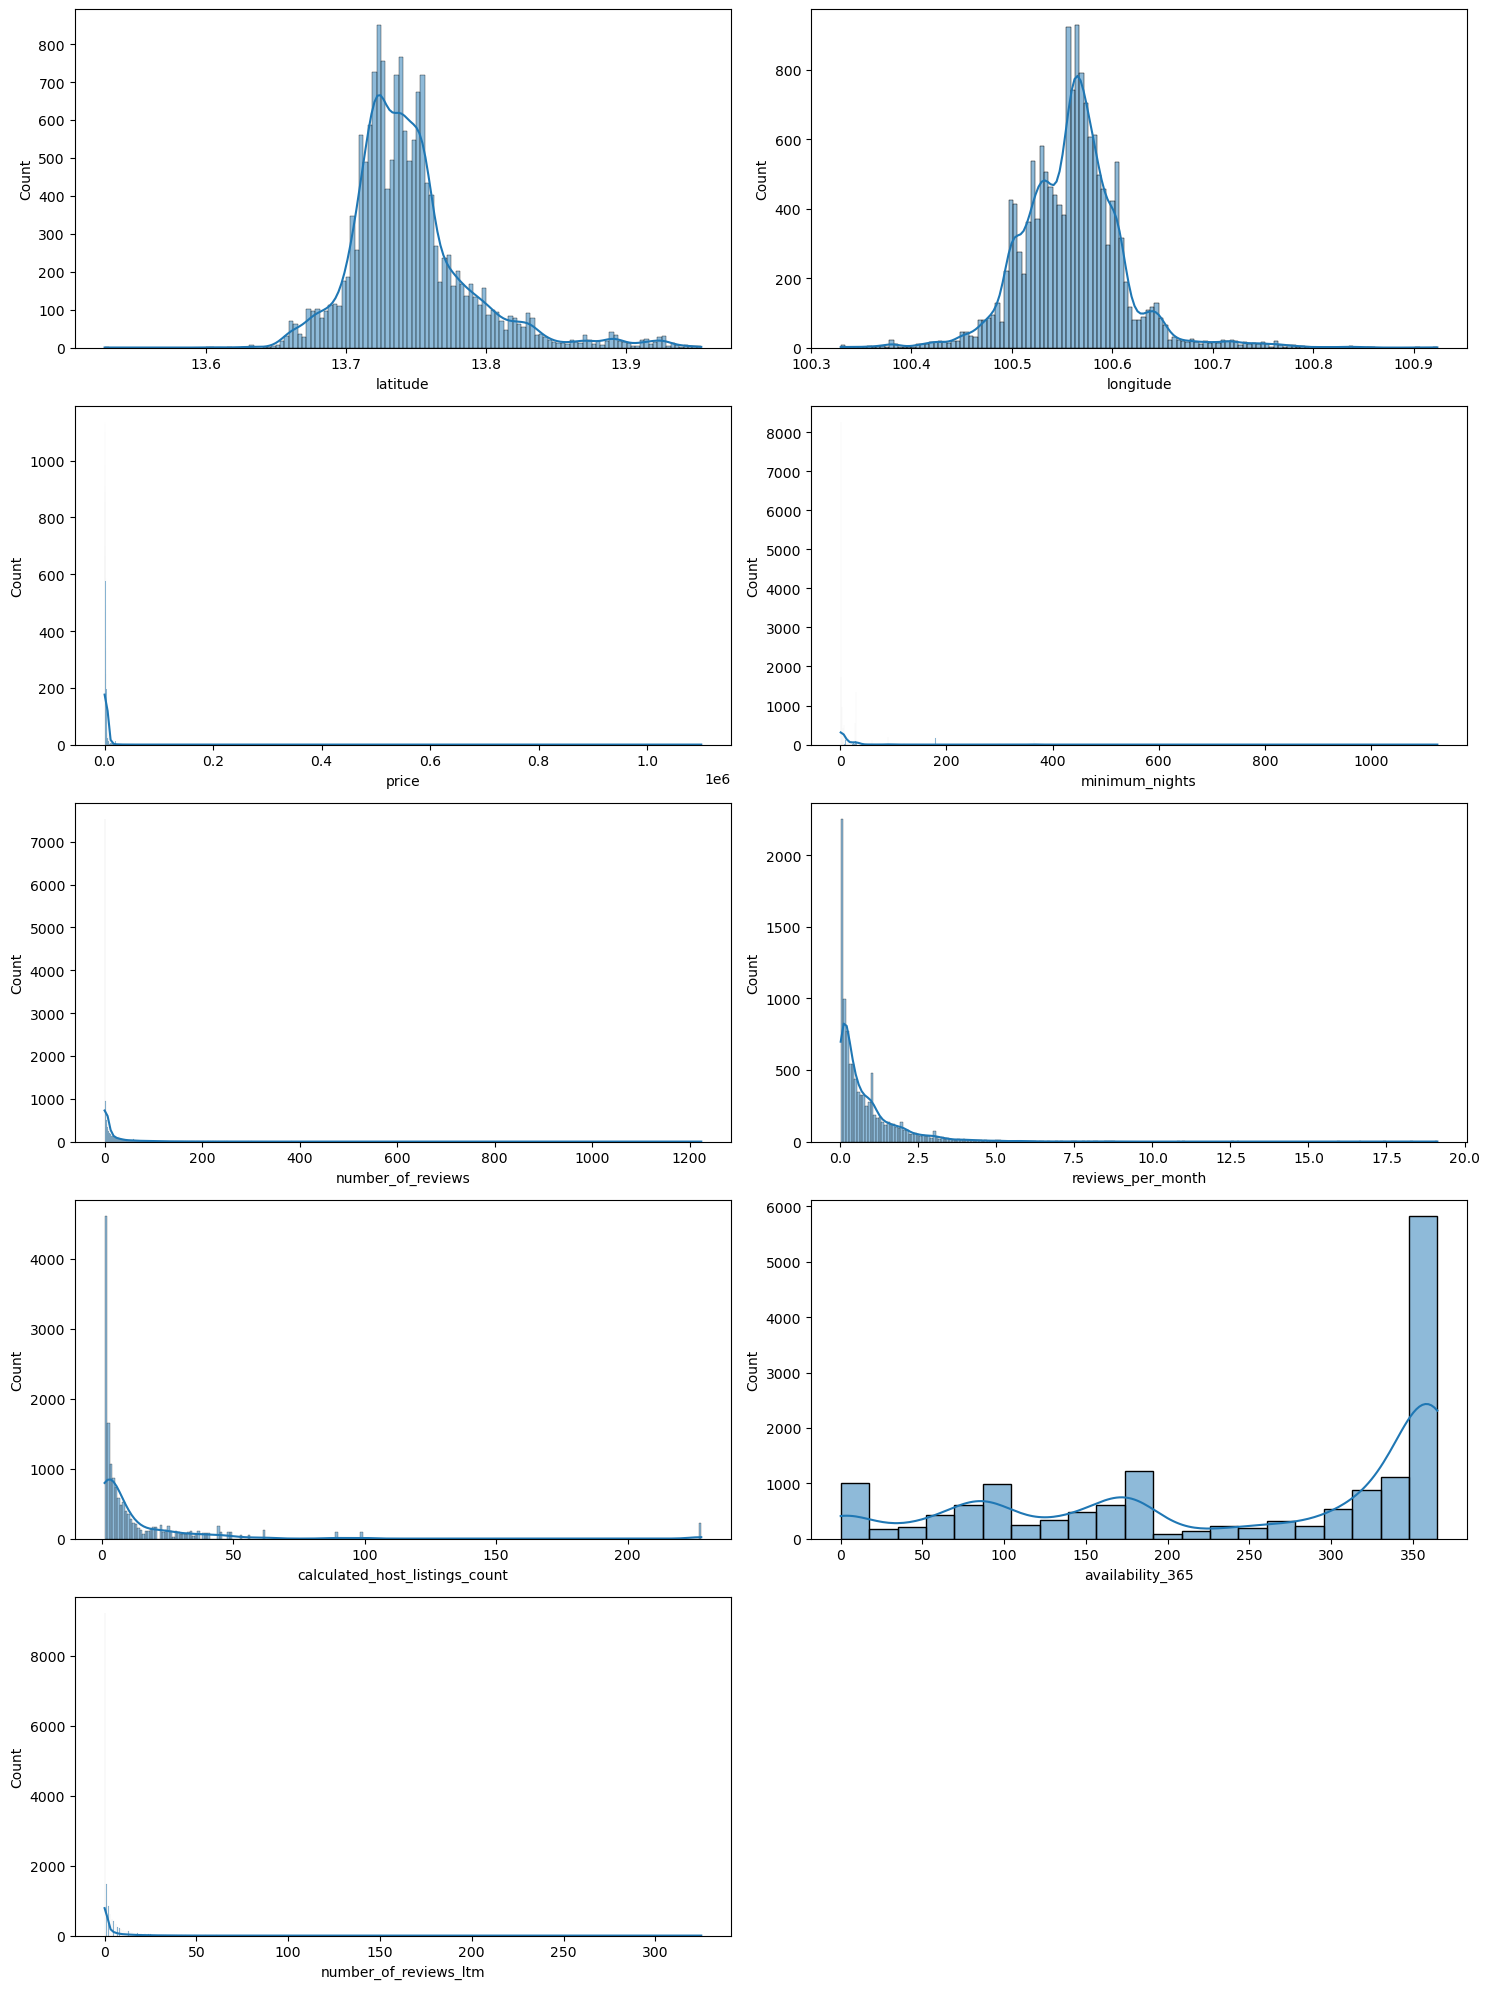

In [12]:
numerik = df.select_dtypes(include = 'number').drop(columns=['id', 'host_id'])

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (15,20)) 

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(5,2,posisi)
    sns.histplot(df[setiap_kolom], kde = True)
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

#### Uji Statistika


In [13]:
# Drop sementara
df_copy = df.copy()
df_copy.dropna(inplace = True)

In [14]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [15]:
# D'Agustino Pearson
from scipy.stats import normaltest

for column in numerik :

        stat, pval = normaltest(df[column])
        print(f"Kolom: {column}")
        if pval < 0.05:
            print('Data tidak normal \n')
        else:
            print('Data normal \n')

Kolom: latitude
Data tidak normal 

Kolom: longitude
Data tidak normal 

Kolom: price
Data tidak normal 

Kolom: minimum_nights
Data tidak normal 

Kolom: number_of_reviews
Data tidak normal 

Kolom: reviews_per_month
Data normal 

Kolom: calculated_host_listings_count
Data tidak normal 

Kolom: availability_365
Data tidak normal 

Kolom: number_of_reviews_ltm
Data tidak normal 



Secara Garis besar dapat disimpulkan bahwa hampir semua data numerik merupakan data tidak normal menggunakan uji D'Agustino Pearson

### Outliers

#### Grafik Boxplot

Untuk melihat sebaran outliers maka dapat dilihat pada grafik Boxplot seperti berikut:

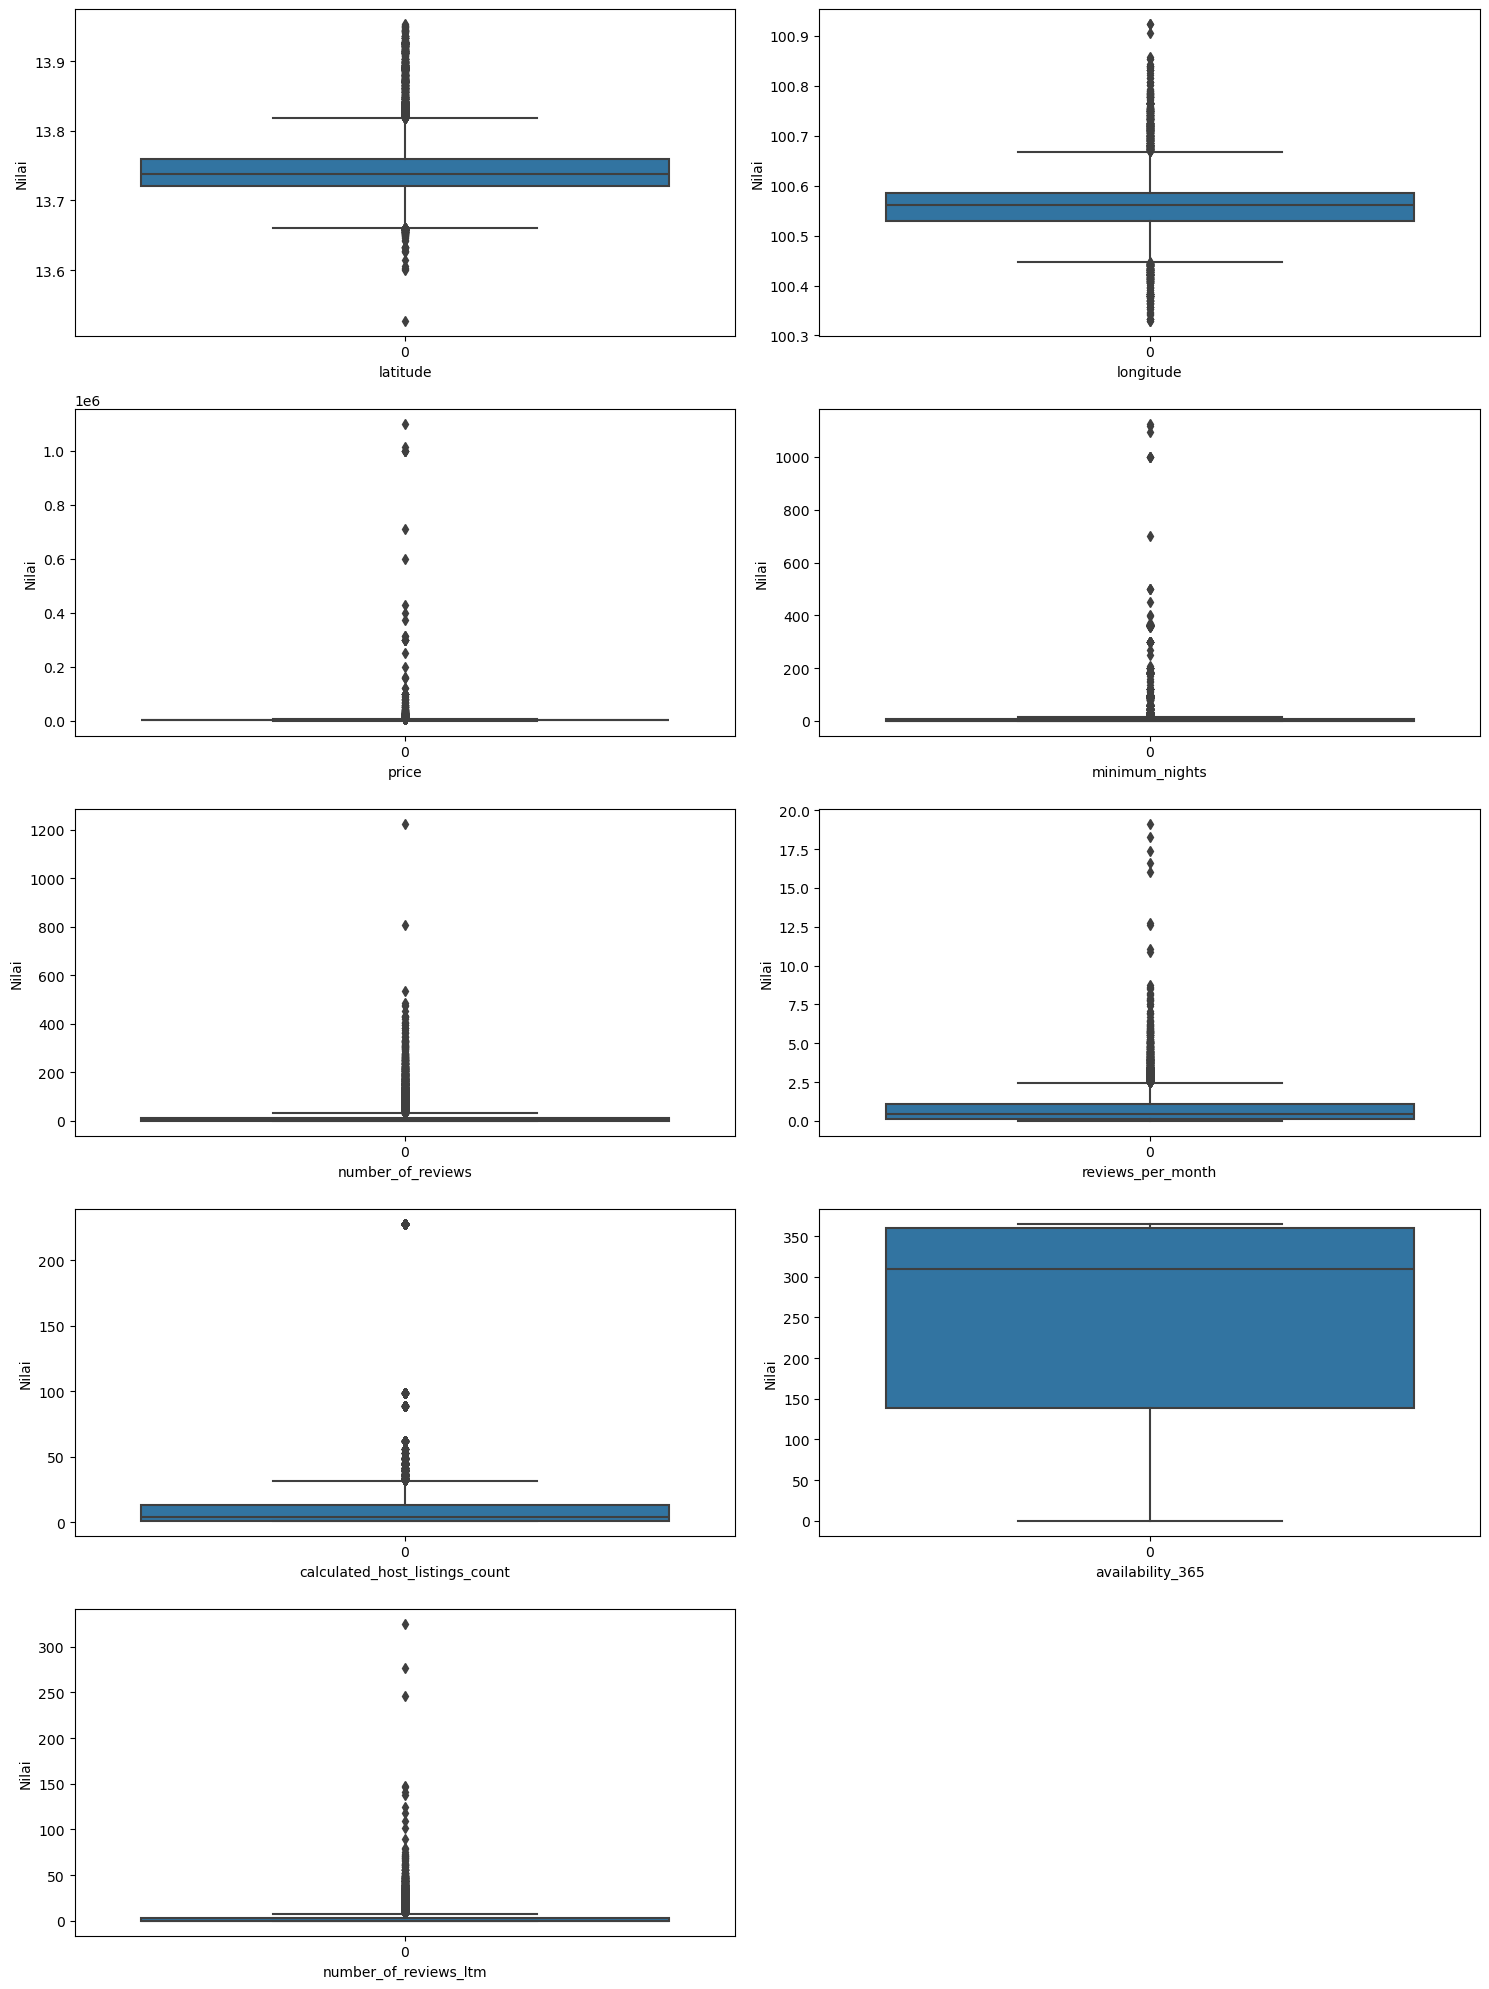

In [16]:
numerik = df.select_dtypes(include = 'number').drop(columns=['id', 'host_id'])

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (15,20))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(5,2,posisi)
    sns.boxplot(df[setiap_kolom])

    plt.xlabel(setiap_kolom)
    plt.ylabel('Nilai')
    
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Dari grafik dapat dilihat bahwa kebayakan data berkelompok sehingga dapat dijadikan acuan untuk data dipertahankan. 

#### Inter Quartile Range (IQR) * 1.5

In [17]:
list_jumlah_outliers = []
list_persentase_outliers = []
total_data = 15854

for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)
    
    # Menghitung persentase outlier
    persentase_outliers = (jumlah_outliers / total_data) * 100
    list_persentase_outliers.append(persentase_outliers)

# Membuat DataFrame dengan jumlah dan persentase outliers
pd.DataFrame({
    'kolom': numerik.columns,
    'jumlah outliers': list_jumlah_outliers,
    'persentase %': list_persentase_outliers
})
 


,kolom,jumlah outliers,persentase %
0,latitude,1095,6.906774
1,longitude,602,3.797149
2,price,1403,8.849502
3,minimum_nights,3168,19.982339
4,number_of_reviews,2240,14.128926
5,reviews_per_month,693,4.371137
6,calculated_host_listings_count,1832,11.555443
7,availability_365,0,0.000000
8,number_of_reviews_ltm,2219,13.996468


Dengan menggunakan *Inter Quartile Range (IQR) * 1.5* maka dapat diketahui jumlah outlier dan persentase pada dataset.Dimana persentase outliers tertinggi 19,98% dan terendah 0%

### Korelasi

Selanjutnya untuk melihat hubungan antar varibel maka dilakukan  korelasi heatmap metode Spearmen karena banyak data tidak normal

#### Heatmap

In [18]:
numerik = df.select_dtypes(include = 'number').drop(columns=['id', 'host_id','latitude','longitude'])
numerik.corr(method = 'spearman')

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.102200,-0.020659,0.136806,0.084520,-0.000549,0.043726
minimum_nights,-0.102200,1.000000,0.036323,-0.065629,-0.127058,-0.124878,0.012733
number_of_reviews,-0.020659,0.036323,1.000000,0.597364,0.221142,-0.264044,0.705412
reviews_per_month,0.136806,-0.065629,0.597364,1.000000,0.239922,-0.114746,0.713749
calculated_host_listings_count,0.084520,-0.127058,0.221142,0.239922,1.000000,-0.054202,0.276462
availability_365,-0.000549,-0.124878,-0.264044,-0.114746,-0.054202,1.000000,-0.212874
number_of_reviews_ltm,0.043726,0.012733,0.705412,0.713749,0.276462,-0.212874,1.000000


<Axes: >

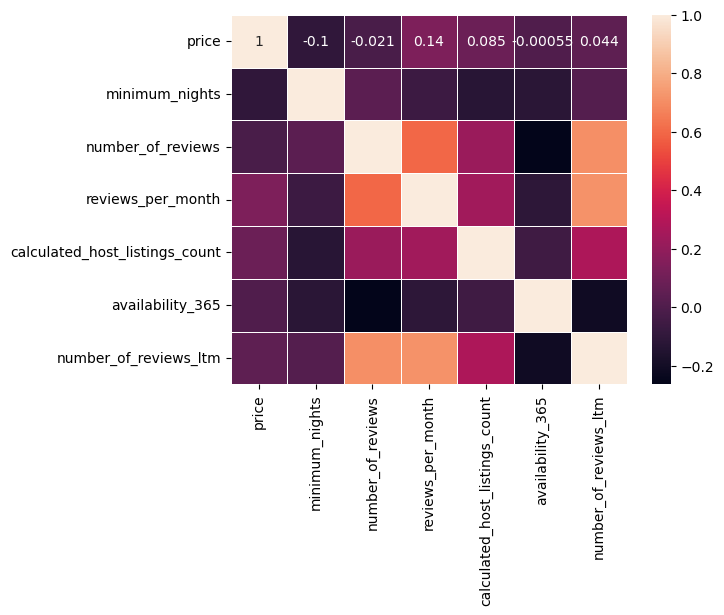

In [19]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True, linewidths=0.5)

Secara garis besar dapat diketahui bahwa korelasi antar hampir cukup rendah. dan nilai korelasi yang diatas 0,5% berkaitan dengan ulasan pada `number_of_reviews` , `reviews_per_mont` dan `number_of_reviews_ltm`. Sehingga nanti perlu dilakukan handling pada outliesnya.

#### Scatter plot

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\wenda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wenda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wenda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wenda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

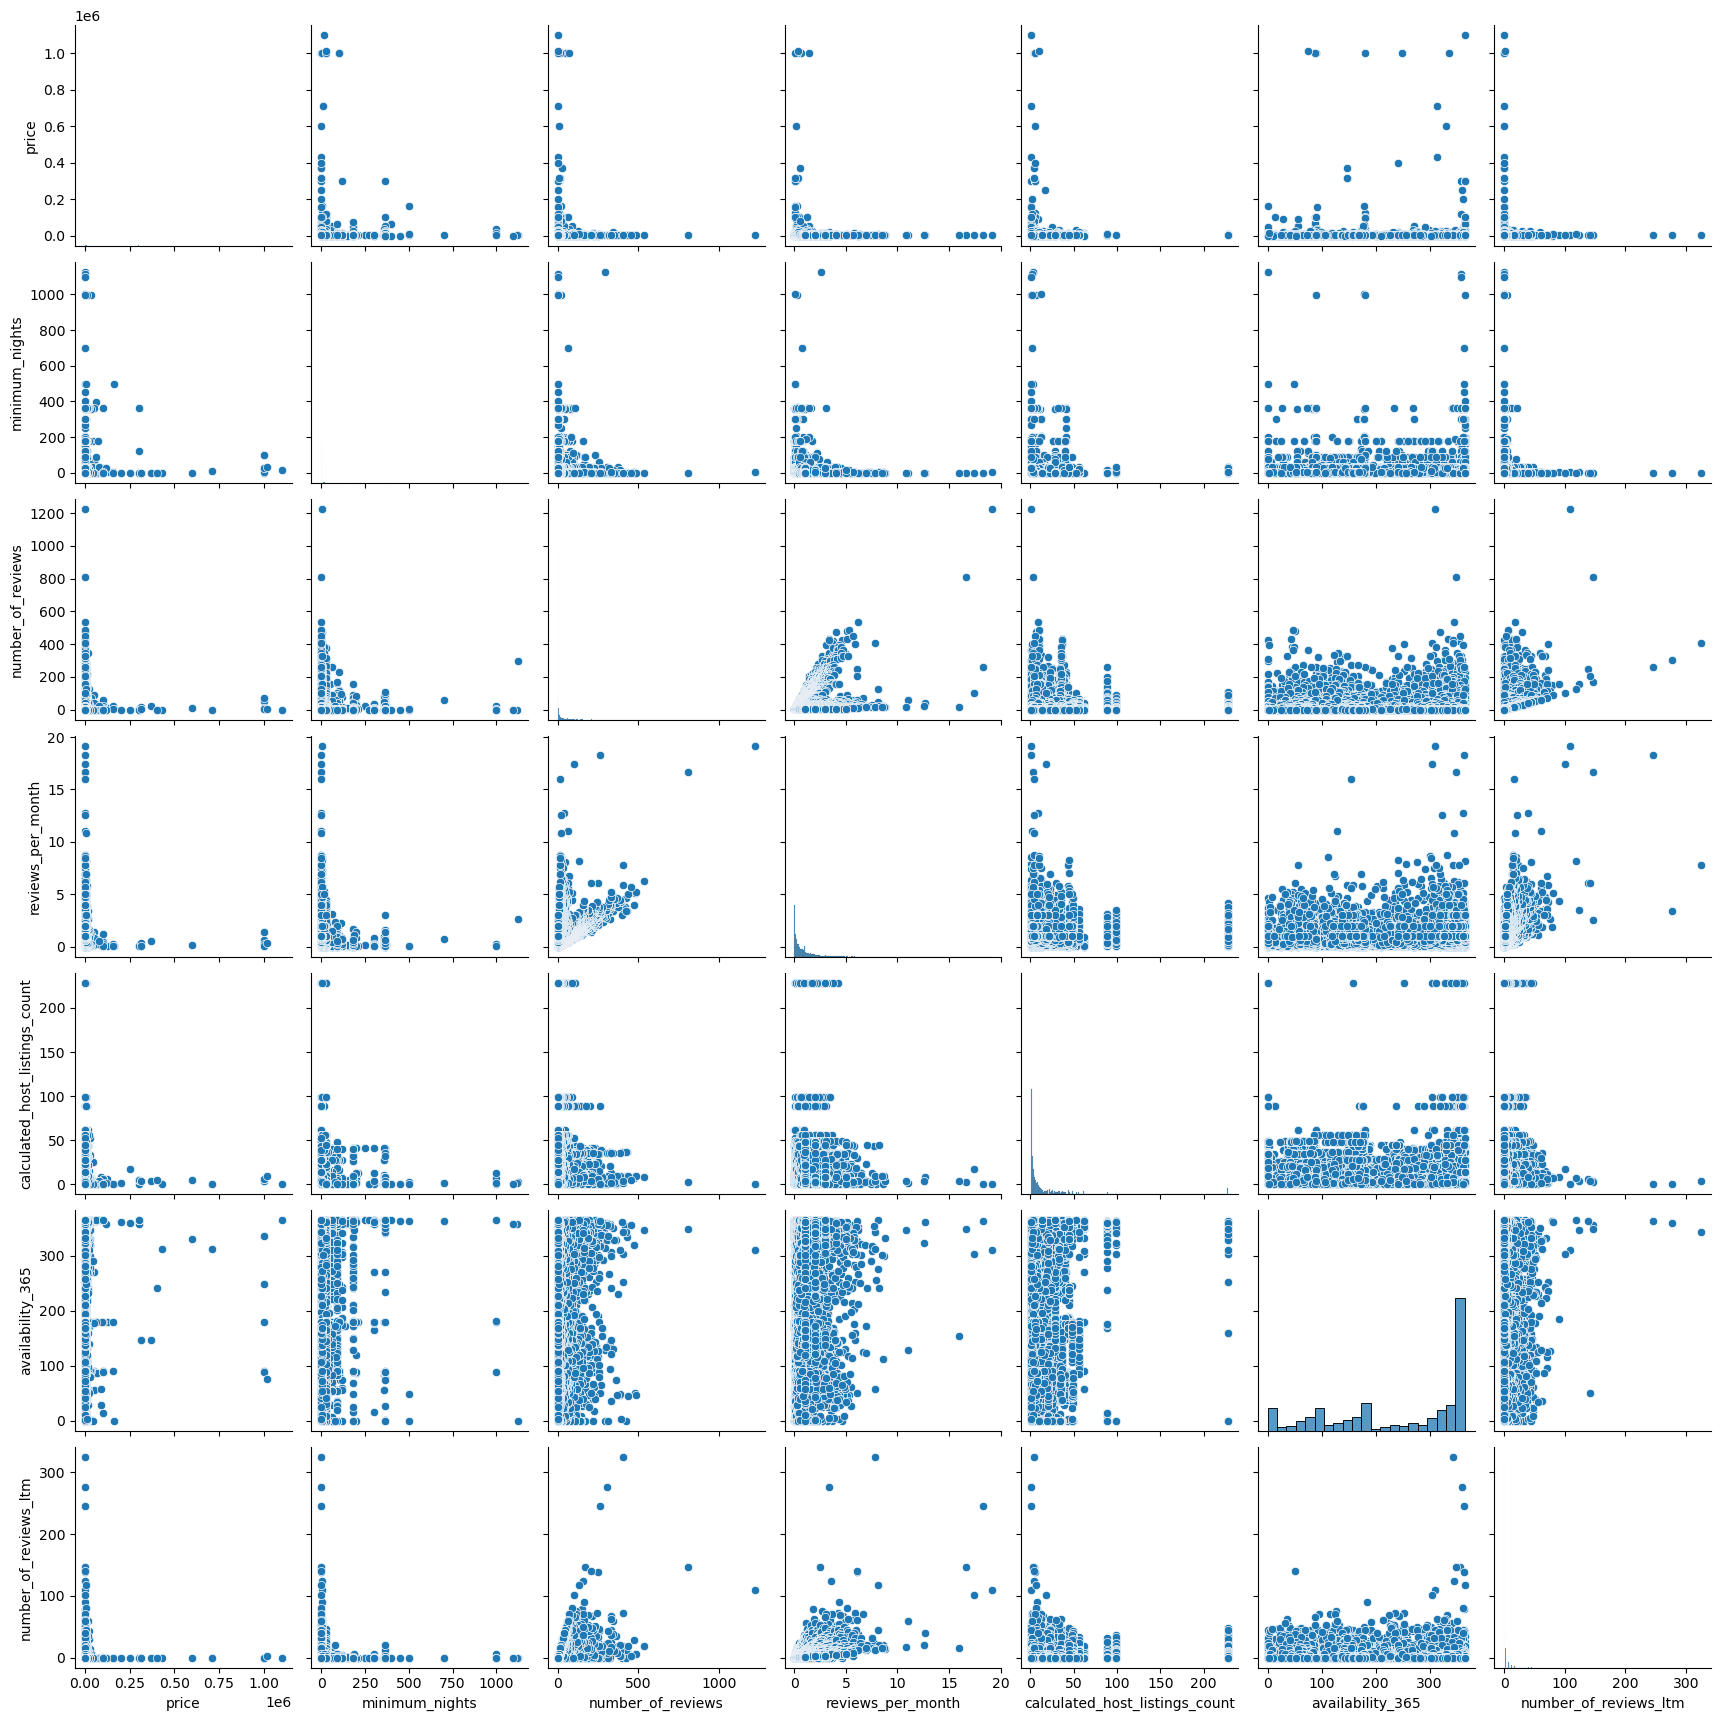

In [21]:
sns.pairplot(numerik)

## Variable Kategorik

Langkah data distribusi pada variable kategorik dengan  deskriptif ,pengecekan unik value, dan value counts

#### Describe

In [22]:
df.describe(include = 'object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


### Unique Value / Kardinalitas

In [23]:
kategorik = df.select_dtypes(include = 'object')

In [144]:
# menghitung jumlah unique value setiap variabel kategorik
counts_unique = kategorik.nunique()
counts_unique

name             14794
host_name         5312
neighbourhood       50
room_type            4
last_review       1669
dtype: int64

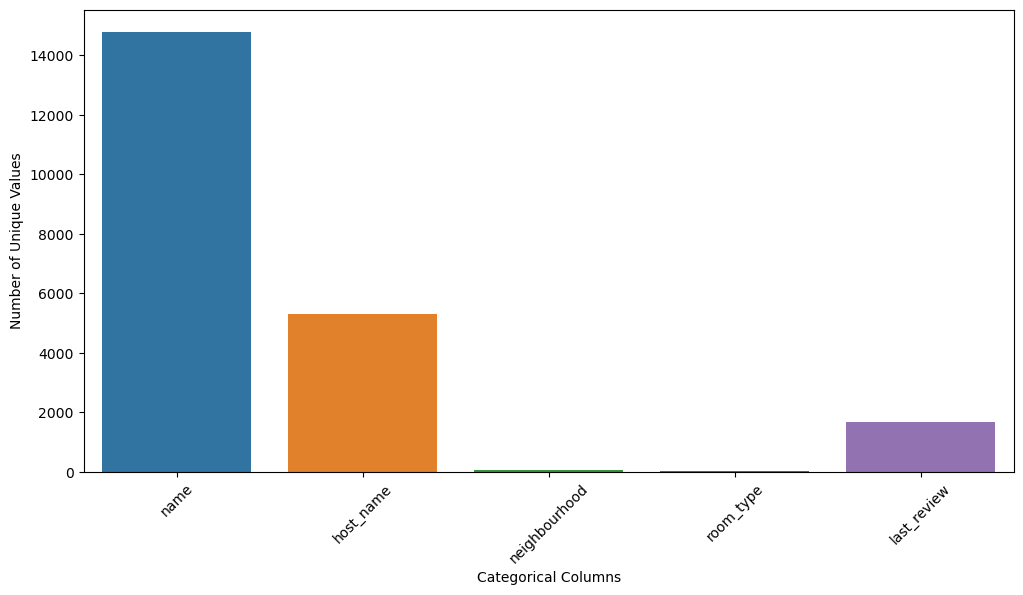

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=counts_unique.index, y=counts_unique.values)
plt.xticks(rotation=45)
plt.xlabel('Categorical Columns')
plt.ylabel('Number of Unique Values')
plt.show()

### Value Counts
Jumlah frequensi untuk setiap value counts nya

In [26]:
df['room_type'].value_counts().head()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

In [27]:
df['neighbourhood'].value_counts()

neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


In [28]:
df['host_name'].value_counts().head()

host_name
Curry       228
Noons        99
K            91
Pornchai     63
Bee          62
Name: count, dtype: int64

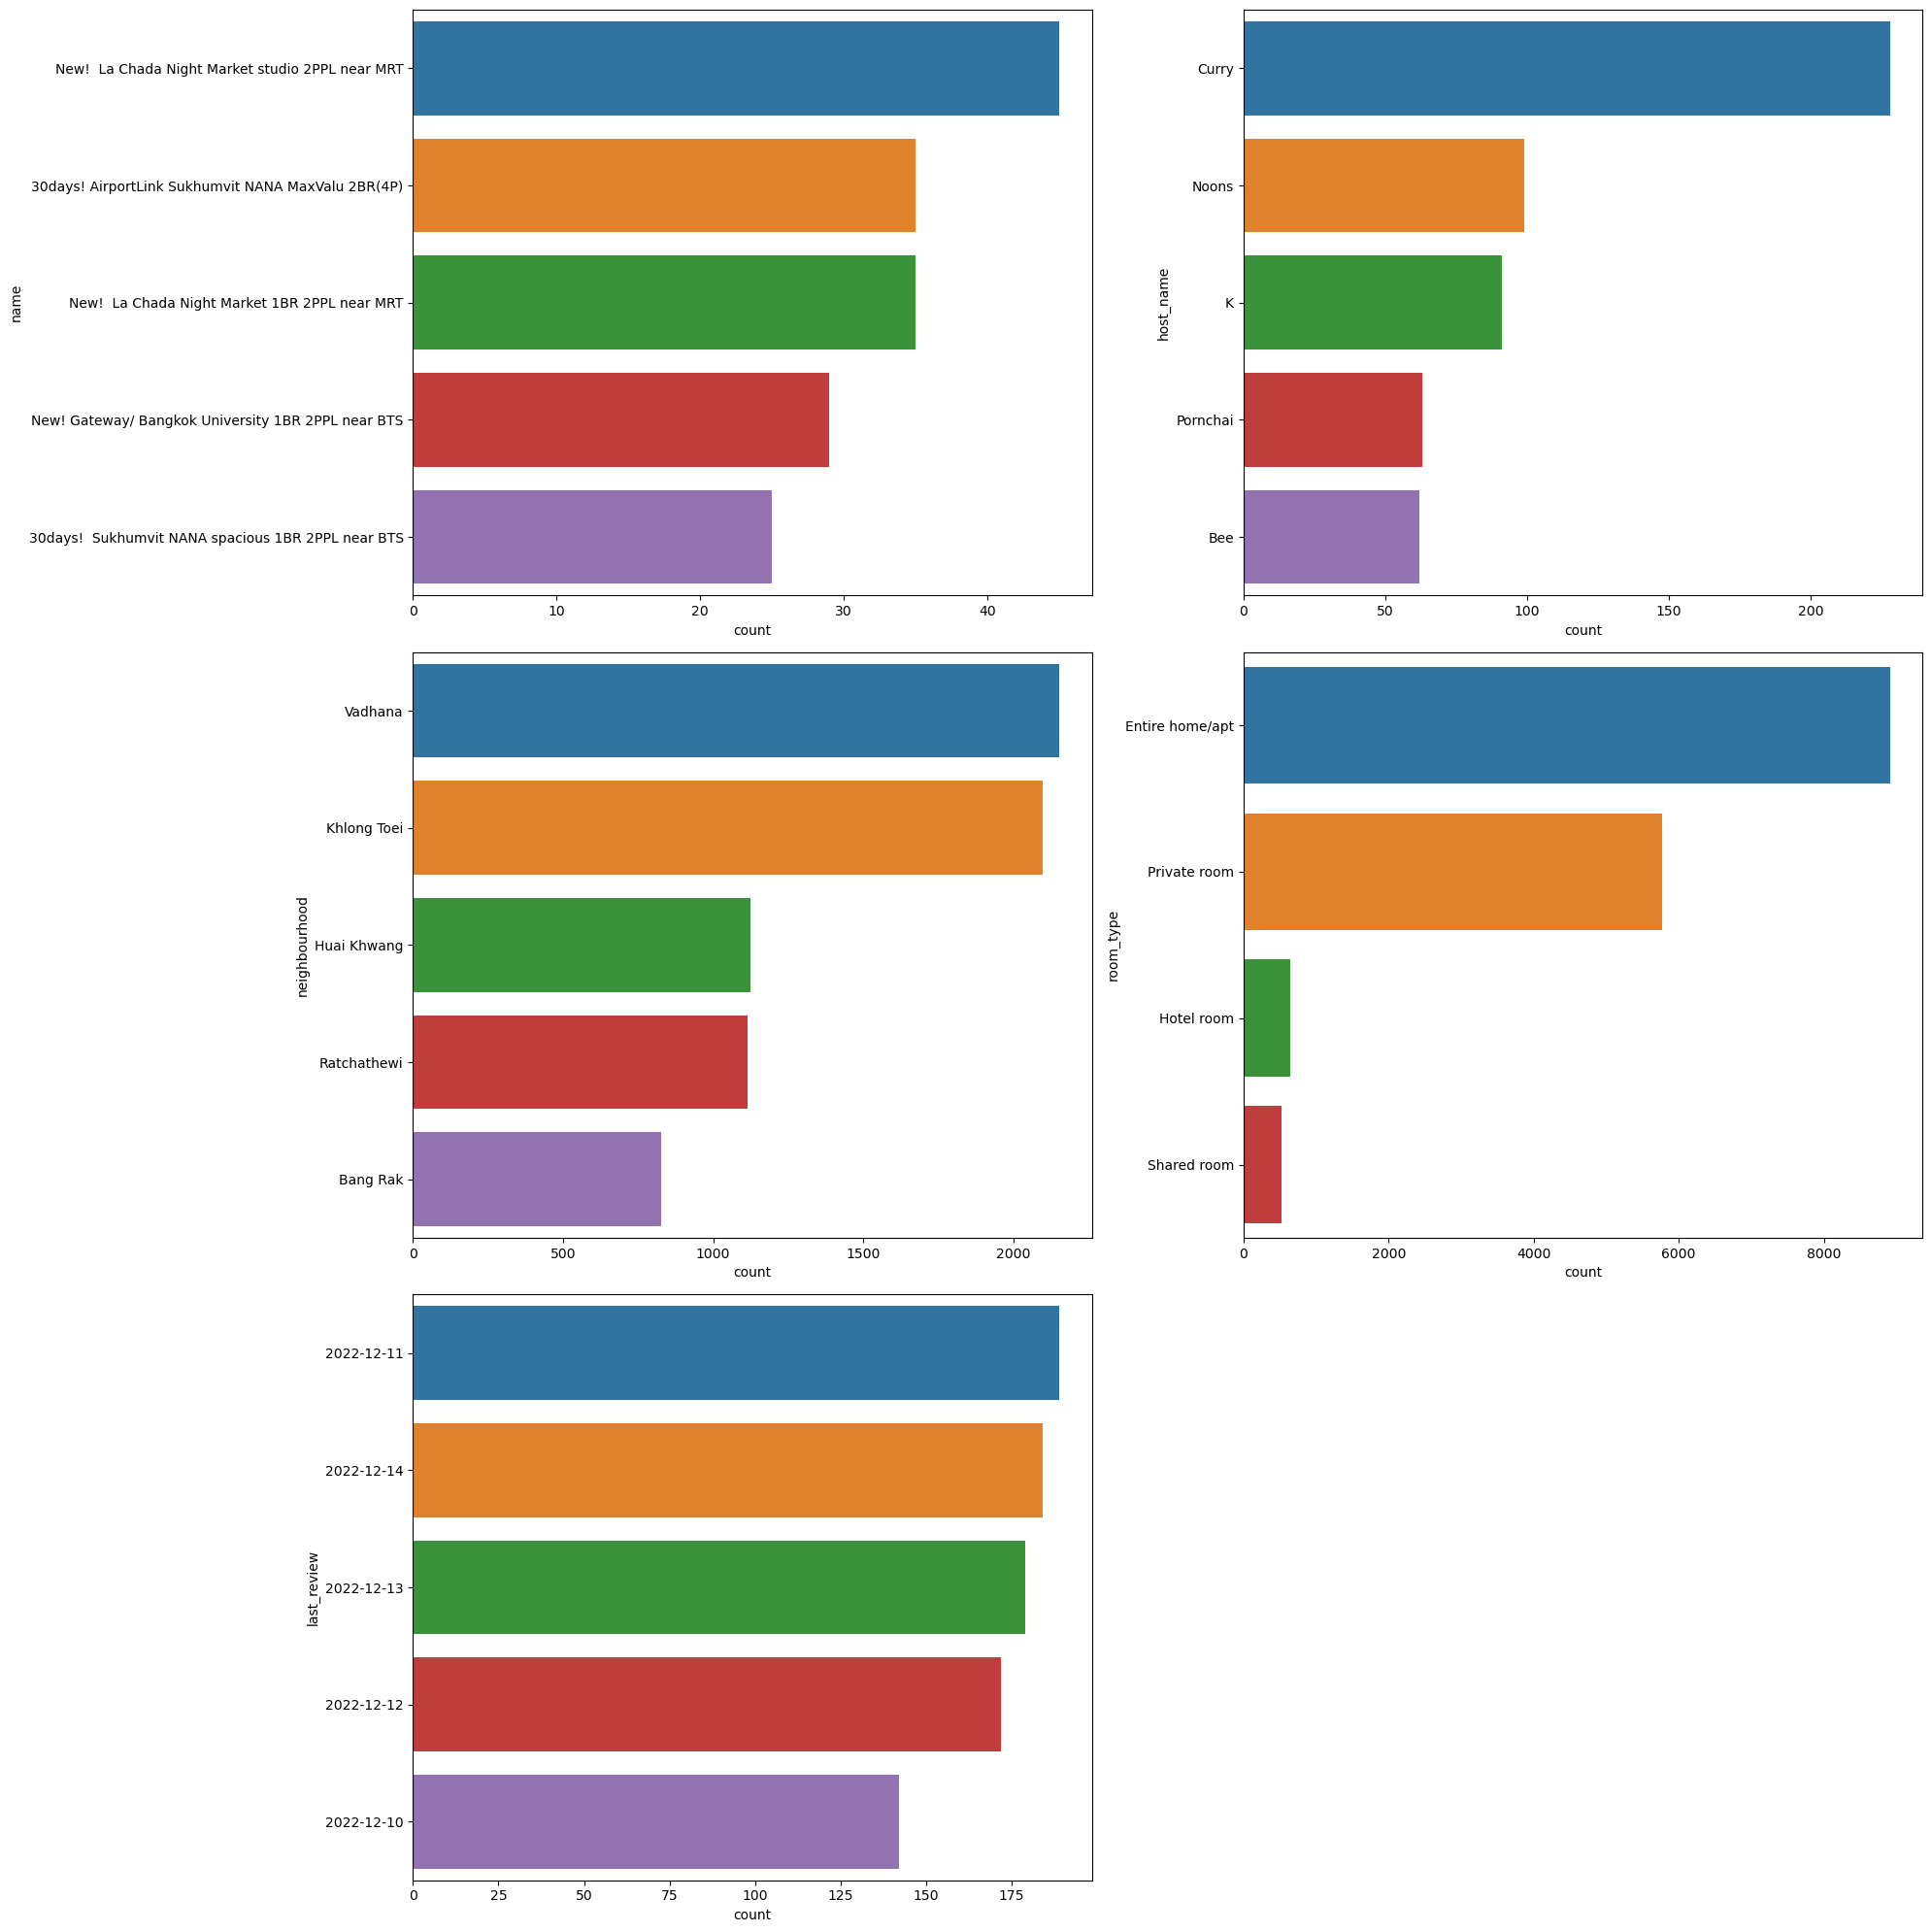

In [29]:
#Dibuat histogram
plt.figure(figsize = (20,20)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in kategorik.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(3,2,posisi)
    values = kategorik [setiap_kolom].value_counts().head().reset_index()
    values.columns = [setiap_kolom,'count']
    sns.barplot(x =values['count'],y = values[setiap_kolom], orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

# Data Cleaning

## `last_review`

### Handling Missing Values

Setelah melihat gambaran matrix maka `last_review` memiliki porsi missing value cukup besar yaitu 36,52% atau 5970 data. Setelah melihat informasi yang terdapat pada yang berupa tanggal ulasan terakhir (dtypes : object) maka diputuskan menghapus kolom ini.

In [102]:
df.drop('last_review',axis=1, inplace=True)

## `review_per_month`

### Handling Missing Values

*missing value* di kolom `last_reviews`dan`reviews_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_reviews` kosong, maka kemungkinan besar data di `reviews_per_month` juga kosong. Sehingga untuk `reviews_per_month`, dirubah menjadi 0 Dkarena sangat mungkin bahwa properti tanpa ulasan memang tidak mendapatkan ulasan pada bulan tertentu.

In [30]:
df['reviews_per_month'].replace(np.nan, 0, inplace=True)

In [31]:
df[df['reviews_per_month'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


## `name`

### Handling Missing Values

Setelah melihat gambaran matrix maka `name` memiliki porsi *missing value* sangat kecil yaitu 0,05% atau 8 data maka diputuskan untuk menghapus tanpa memperkenalkan nilai yang tidak pasti/akurat 

In [32]:
df.dropna(subset=['name'], inplace=True)

In [33]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


## `host_name`

### Handling Missing Values

Dari gambaran matrix  `host_name` memiliki porsi *missing value* sangat kecil yaitu 0,01% atau 1 data maka diputuskan untuk menghapus tanpa memperkenalkan nilai yang tidak pasti/akurat

In [34]:
df.dropna(subset=['host_name'], inplace=True)

In [35]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


## `longitude` dan `latitude`

### Handling Outliers
Dengan jumlah outliers latitude memiliki 1095 outliers dan longitude memiliki 602 outliers dari total 15854 data (sekitar 6.9% dan 3.8% dari total data). Setelah melihat informasi yang ada pada kolom maka diputusakan untuk mengahapusnya karena dianggap terwakili dari keterangan lokasi `neighbourhood`

In [ ]:
df.drop(['longitude', 'latitude'], axis=1, inplace=True)

## `price`

### Handling Outliers
Dengan jumlah outliers  1403 outliers atau 8,85% .Setelah dilihat dari grafik boxplot,agar tidak hilangnya informasi maka akan difilter outlier yang jauh dari kelompokdan memperbarui dataFrame

In [109]:
df = df[(df['price'] <= 0.50e6)]

## `minimum_nights`

### Handling Outliers
Dengan jumlah outliers  3168 outliers atau 19,98% ,Setelah dilihat dari grafik boxplot,agar tidak hilangnya informasi maka akan difilter outlier yang jauh dari kelompokdan memperbarui dataFrame

In [108]:
df = df[(df['minimum_nights'] <= 550)]

## `number_of_reviews`

### Handling Outliers
Dengan jumlah outliers  2240 outliers, Setelah dilihat dari grafik boxplot,agar tidak hilangnya informasi maka akan difilter outlier yang jauh dari kelompokdan memperbarui dataFrame

In [107]:
# Number_of_Reviews

df = df[(df['number_of_reviews'] <= 600)]

## `reviews_per_month`

### Handling Outliers
Dengan jumlah outliers  sebanyak 693 outlier, Setelah dilihat dari grafik boxplot,agar tidak hilangnya informasi maka akan difilter outlier yang jauh dari kelompokdan memperbarui dataFrame

In [106]:
# Reviews_per_month

df = df[(df['reviews_per_month'] <= 9)]

## `calculated_host_listings_count`  

### Handling Outliers
Dengan jumlah outliers  1832 outliers .Setelah dilihat dari grafik boxplot,agar tidak hilangnya informasi maka akan difilter outlier yang jauh dari kelompokdan memperbarui dataFrame

In [ ]:
#calculated_host_listings_count	
df = df[(df['calculated_host_listings_count'] <= 75)]

## `number_of_reviews_ltm`

### Handling Outliers
Dengan jumlah outliers  2219 outlier.Setelah dilihat dari grafik boxplot,agar tidak hilangnya informasi maka akan difilter outlier yang jauh dari kelompokdan memperbarui dataFrame

In [ ]:
#number_of_reviews_ltm	
df = df[(df['number_of_reviews_ltm'] <= 150)]

# Data Sudah Cleaned

Setelah selesai data dibersihkan, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [112]:
df.to_csv('Airbnb_Listings_Bangkok_cleaned.csv', index=False)

In [113]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(4).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15819, 13)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15819,"[49120179, 767764859353444538, 651433584482306..."
1,name,object,0,14768,[K13】曼谷沙吞区金融中心全新复式高端公寓&泰国第一高楼景观&无边泳池空中Gym&5分钟到...
2,host_id,int64,0,6645,"[101901585, 293623768, 10516482, 20835021]"
3,host_name,object,0,5302,"[Sureerat, Emanuelle, Parkpoom, Sirinthip]"
4,neighbourhood,object,0,50,"[Wang Thong Lang, Din Daeng, Phaya Thai, Rat B..."
5,room_type,object,0,4,"[Shared room, Hotel room, Entire home/apt, Pri..."
6,price,int64,0,3029,"[2714, 1786, 4571, 2242]"
7,minimum_nights,int64,0,79,"[14, 500, 35, 4]"
8,number_of_reviews,int64,0,295,"[243, 13, 48, 89]"
9,reviews_per_month,float64,0,505,"[3.2, 4.61, 4.91, 8.49]"


Sebelum dibersihkan, kita memiliki 15.854 baris data, sekarang kita memiliki 15389 baris. Sekitar 400an baris data yang kosong dan outliers terjauh dihapus, dan  data kosong diisi dengan data yang dirasa relevan. 


Setelah pembersihan data maka dilihat lagi korelasi terhadap varible numerik untuk melihat anomali yang terjadi pada dataset

In [115]:
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

In [117]:
correlation_matrix.corr(method = 'spearman')

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.750000,-0.785714,-0.785714,-0.785714,0.642857,-0.678571
minimum_nights,0.750000,1.000000,-0.750000,-0.964286,-0.857143,0.892857,-0.928571
number_of_reviews,-0.785714,-0.750000,1.000000,0.857143,0.571429,-0.857143,0.821429
reviews_per_month,-0.785714,-0.964286,0.857143,1.000000,0.750000,-0.928571,0.964286
calculated_host_listings_count,-0.785714,-0.857143,0.571429,0.750000,1.000000,-0.642857,0.714286
availability_365,0.642857,0.892857,-0.857143,-0.928571,-0.642857,1.000000,-0.964286
number_of_reviews_ltm,-0.678571,-0.928571,0.821429,0.964286,0.714286,-0.964286,1.000000


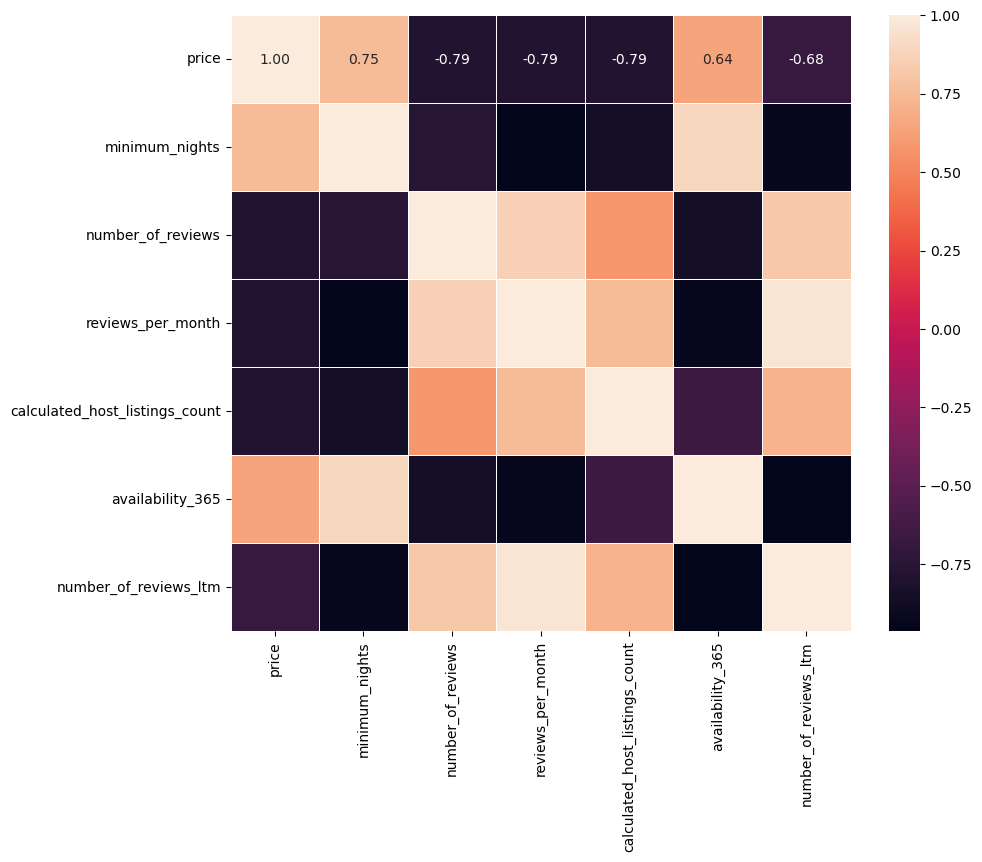

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.corr('spearman'), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

Hasil uji korelasi menjukkan beberapa hubungan beberapa antar varibel numerik sebagai berikut :
* `price` (harga sewa) memiliki kolerasi positif yang cukup kuat dengan `minimum_nignts` (0.75) dan  `availability_365` (0.64). Dimana semakin tinggi harga sewa `price` maka jumlah minimal penyewaan `minimum_nigts` yang ditawarkan juga semakin lama/ tinggi. Sebanding juga dengan tingginya `availability_365` atau bisa dikatakan tidak byk terjadi transaksi penyewaan. Bisa dikatakan ini berbanding lurus.
* `price` (harga sewa) memiliki kolerasi negatif yang cukup kuat dengan `number_of_reviews`(-0,79) dan `calculated_host_listings_count` (-0,79). Dimana semakin tinggi harga sewa `price` maka jumlah `number_of_reviews` dan `calculated_host_listings_count` tidak banyak (berbanding terbalik).
*`minimum_nigts`memiliki kolerasi positif yang cukup kuat terhadap `price` , `availability_365` ,	`number_of_reviews_ltm`.Dimana nilainya akan berbanding lurus.
*`minimum_nigts`memiliki kolerasi negatif yang cukup kuat dengan `number_of_reviews`, `reviews_per_month`,	`calculated_host_listings_count` Dimana nilainya akan berbanding terbalik
* `number_of_reviews` memiliki kolerasi negatif yang cukup kuat dengan `minimum_nigts`dan `availability_365`.Dimana semakin tinggi `number_of_reviews`maka nilai`minimum_nigts`dan `availability_365`rendah (berbanding terbalik) dan sebaliknya
* `number_of_reviews` memiliki kolerasi positif yang cukup kuat dengan `calculated_host_listings_count`dan `reviews_per_month`dan `number_of_reviews_ltm` 
Dimana nilainya akan berbanding lurus.
*`availability_365` memiliki kolerasi positif yang cukup kuat dengan `price`, `minimum_nights` Dimana nilainya akan berbanding lurus.
*`availability_365` memiliki kolerasi negatif yang cukup kuat dengan `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`	Dimana nilainya akan berbanding lurus.

# Data Analysis

Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana pengaruh kriteria penginapan yang mempengaruhi penyewaan `availability_365` nantinya pada listing Airbnb Bangkok**.  

Analisis akan dilakukan dengan membandingkan tingkat minat penyewa secara tahunan (`availability_365`) terhadap variabel yang tersedia. Dari 15.854 data yang kita miliki diketahui terdapat data unik 50 lokasi `neighbourhod`yang perlu kita bandingkan untuk memnetukan kriteria yang tepat berdasarkan ratio, terutama pada data bertipe kategorikal.

In [ ]:
df = pd.read_csv('Airbnb_Listings_Bangkok_cleaned.csv')

## Berdasarkan `availability_365` dan `neighbourhood`

Pertama kita cari hubungan `availability_365` dan `neighbourhood` bagaimana hubungan lokasi menentukan banyaknya jumlah penyewa sehingga nilai ketersedian penginapan selama setahun dapat diketahui. Sebelumnya kita lihat lokasi yang banyak penginapan di Bangkok


In [121]:
# 10 lokasi yang penginapan terbanyak
loc_counts = df['neighbourhood'].value_counts().head(10)
loc_counts

neighbourhood
Vadhana         2148
Khlong Toei     2090
Huai Khwang     1122
Ratchathewi     1113
Bang Rak         826
Sathon           808
Phra Nakhon      619
Phra Khanong     556
Chatu Chak       547
Bang Na          455
Name: count, dtype: int64

Dari hasil list lokasi dengan penginapan tertinggi belum menentukan lokasi tersebut diminati penyewa. Selanjutnya lihat lokasi mana yang lebih banyak ditempati pengunjung dengan nilai `availability_365` kecil

In [122]:
df_data = pd.crosstab(df['neighbourhood'], df['availability_365'])

# Menambahkan kolom 'Total' yang berisi jumlah total availability per neighbourhood
df_data['Total'] = df_data.iloc[:, 0:31].sum(axis=1)

# Memfilter kolom availability_365 hanya untuk nilai dari 0 hingga 10
df_data_filtered = df_data.loc[:, list(range(0, 31)) + ['Total']]

fav_neighbourhood = df_data_filtered.sort_values('Total',ascending=False).head(10)
# Menampilkan hasil

fav_neighbourhood

availability_365,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Total
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Huai Khwang,153,5,1,1,1,1,1,0,2,0,...,2,1,0,0,1,1,1,1,0,182
Vadhana,112,2,4,0,3,0,1,0,0,1,...,1,2,1,0,0,2,7,3,2,157
Khlong Toei,74,8,3,1,0,1,0,2,1,2,...,4,1,1,3,2,1,3,1,3,122
Bang Rak,58,3,1,1,0,0,0,0,1,0,...,1,1,1,2,0,1,3,0,0,78
Phra Nakhon,59,6,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,2,0,0,70
Ratchathewi,50,2,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,61
Sathon,26,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,4,0,0,38
Chatu Chak,29,2,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,37
Parthum Wan,25,2,0,0,1,0,0,0,0,0,...,0,1,0,2,0,1,0,0,0,34


Dari hubungan kedua variavbel dapat 10 lokasi yang banyak disewa pengunjung selama setahun sehingga  `availabilty_365`  kecil. ternyata Huai Khwang lebih diminati penyewa atau hampir selalu penuh. Berikutnya kita tampilan grafik histogramnya

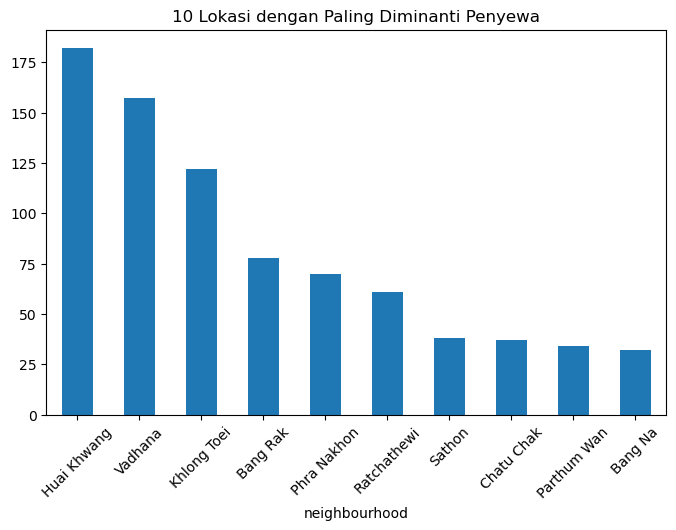

In [148]:
fav_neighbourhood['Total'].plot(kind='bar',figsize=(8,5),  
title='10 Lokasi dengan Paling Diminanti Penyewa')
plt.xticks(rotation=45)
plt.show()

## Berdasarkan `neighbourhood` dan `room_type`

In [133]:
# Daftar neighbourhood paling sering full selama setahun
neighbourhood_list = ['Huai Khwang', 'Vadhana', 'Khlong', 'Bang Rak','Phra Nakhon','Ratchathewi','Sathon','Chatu Chak','Parthum Wan','Bang Na']

# Filter DataFrame berdasarkan neighbourhood
df_filtered = df[df['neighbourhood'].isin(neighbourhood_list)]

# Buat crosstab
crosstab_filtered = pd.crosstab(df_filtered['neighbourhood'], df['room_type'])

crosstab_filtered.sort_values('neighbourhood',ascending=False)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Vadhana,1449,105,541,53
Sathon,556,15,220,17
Ratchathewi,656,70,326,61
Phra Nakhon,56,77,355,131
Parthum Wan,254,45,140,15
Huai Khwang,773,25,301,23
Chatu Chak,272,2,266,7
Bang Rak,351,67,374,34
Bang Na,275,9,168,3


<Figure size 1000x800 with 0 Axes>

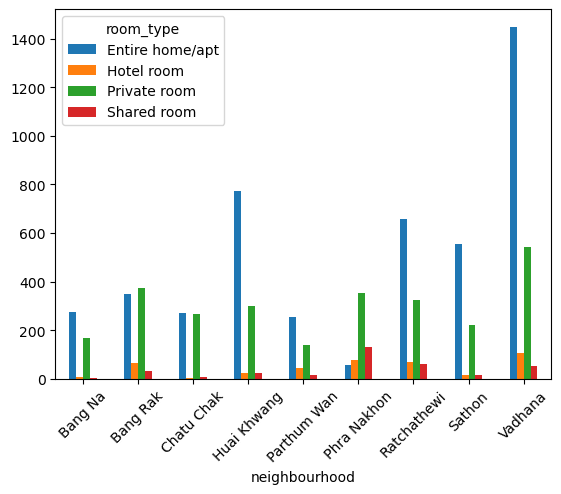

In [147]:
plt.figure(figsize = (10,8))
pd.crosstab(df_filtered['neighbourhood'], df['room_type']).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [129]:
column_totals = crosstab_filtered.sum(axis=0)
column_totals

room_type
Entire home/apt    4642
Hotel room          415
Private room       2691
Shared room         344
dtype: int64

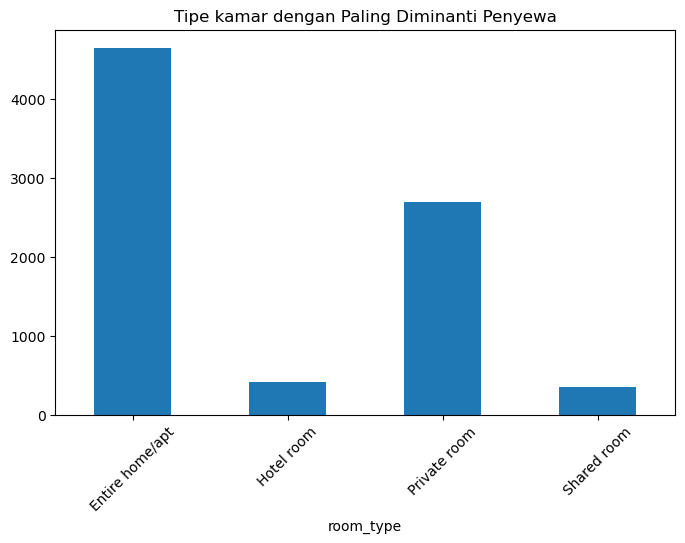

In [146]:
column_totals.plot(kind='bar',figsize=(8,5),  
title='Tipe kamar dengan Paling Diminanti Penyewa')
plt.xticks(rotation=45)
plt.show()

Tipe Ruangan yang paling diminati yaitu Entire home/apt dan Private room di semua kota 

In [135]:
from scipy.stats import chi2_contingency

pval = chi2_contingency(pd.crosstab(df_filtered['neighbourhood'], df['room_type']))[1]

if pval > 0.05:
    print(f"H0 gagal menolak: Proporsi 'neighbourhood' sama (pvalue = {pval})")
    print("ada cukup bukti untuk tidak bisa menolak H0")
else:
    print(f"H0 ditolak: Proporsi 'neighbourhood tidak sama (pvalue = {pval})")
    print("tidak ada cukup bukti untuk menerima H0")

H0 ditolak: Proporsi 'neighbourhood tidak sama (pvalue = 3.5324386942744726e-256)
tidak ada cukup bukti untuk menerima H0


Berarti dapat disimpulkan  jenis kamar yang tersedia bervariasi secara signifikan tergantung pada lingkungan tempat mereka berada.

## Berdasarkan `availability_365` dan `room_type`

In [141]:
df_data = pd.crosstab(df['room_type'], df['availability_365'])

# Menambahkan kolom 'Total' yang berisi jumlah total availability per minimum_nights
df_data['Total'] = df_data.iloc[:, 0:31].sum(axis=1)

# Memfilter kolom availability_365 hanya untuk nilai dari 0 hingga 1030
df_data = df_data.loc[:, list(range(0, 31)) + ['Total']]

fav_room = df_data.sort_values('Total',ascending=False).head(10)
# Menampilkan hasil

fav_room

availability_365,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Total
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,507,23,10,5,6,3,3,3,4,4,...,8,4,4,6,7,13,23,8,7,703
Private room,251,17,4,2,4,0,2,2,0,2,...,2,2,3,4,0,3,9,2,6,330
Hotel room,82,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,86
Shared room,16,5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,22


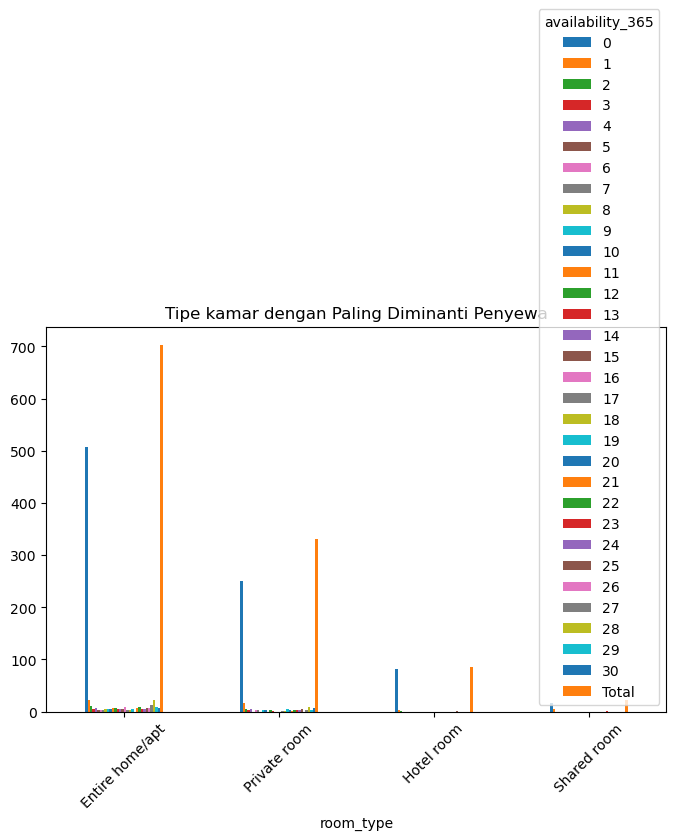

In [145]:
fav_room.plot(kind='bar',figsize=(8,5),  
title='Tipe kamar dengan Paling Diminanti Penyewa')
plt.xticks(rotation=45)
plt.show()

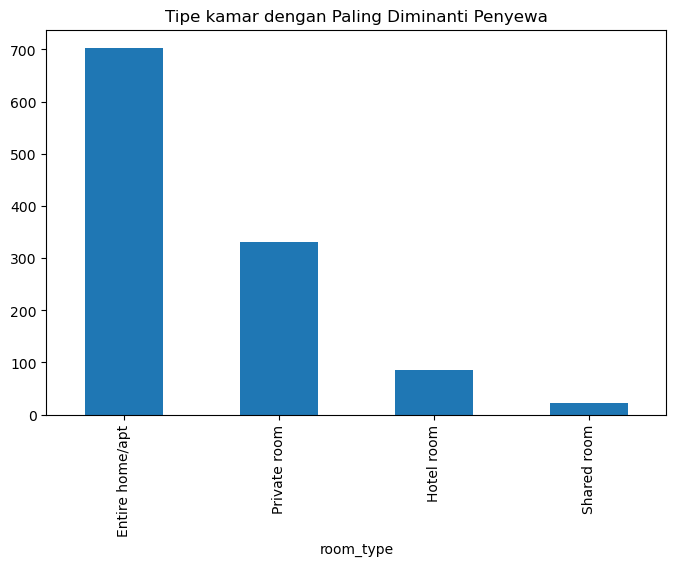

In [143]:
fav_room['Total'].plot(kind='bar',figsize=(8,5),  
title='Tipe kamar dengan Paling Diminanti Penyewa')
plt.show()

Berdasarkan Grafik juga diketahui tipe Ruang yang banyak diminati penyewa yaitu Entire home/apt.

## Berdasarkan `availability_365` dan `minimum_nights`

In [149]:
df_data = pd.crosstab(df['minimum_nights'], df['availability_365'])

# Menambahkan kolom 'Total' yang berisi jumlah total availability per minimum_nights
df_data['Total'] = df_data.iloc[:, 0:31].sum(axis=1)

# Memfilter kolom availability_365 hanya untuk nilai dari 0 hingga 10
df_data_filtered = df_data.loc[:, list(range(0, 31)) + ['Total']]

fav_min_nights = df_data_filtered.sort_values('Total',ascending=False).head(10)
# Menampilkan hasil

fav_min_nights

availability_365,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Total
minimum_nights,,,,,,,,,,,,,,,,,,,,,
1,509,30,8,5,3,1,1,1,1,2,...,1,2,5,6,2,5,12,1,4,620
2,85,4,3,0,0,0,1,1,1,1,...,5,2,0,1,0,2,7,5,2,129
30,69,3,1,0,3,0,2,0,1,0,...,0,0,0,0,1,2,3,0,3,99
3,44,3,1,2,1,1,0,0,0,1,...,2,1,1,1,1,0,1,1,0,70
28,28,1,1,0,0,0,0,1,0,0,...,1,1,0,0,0,2,2,0,1,41
7,27,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,32
5,18,2,1,0,1,0,0,0,0,0,...,1,0,0,0,0,2,2,0,0,31
10,10,0,0,0,2,0,0,0,0,0,...,0,0,0,0,1,0,2,0,0,16
14,7,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,12


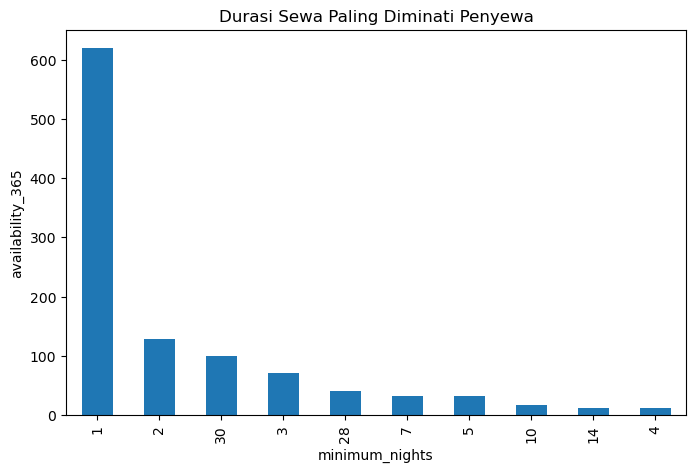

In [151]:
fav_min_nights['Total'].plot(kind='bar',figsize=(8,5),  
title='Durasi Sewa Paling Diminati Penyewa')
plt.xlabel('minimum_nights')
plt.ylabel('availability_365')
plt.show()

Dari Grafik juga diketahui bahwa Penyewa lebih menyukai sewa 1 malam.

## Berdasarkan `room_type` terhadap `price` rata-rata dan Lokasi Paling diminati


In [154]:
# Langkah 1: Filter DataFrame berdasarkan neighbourhood_list
df_filtered = df[df['neighbourhood'].isin(neighbourhood_list)].copy()

# Langkah 2: Tambahkan kolom baru untuk menghitung price rata-rata per hari
df_filtered['price_per_day'] = df_filtered['price'] / df_filtered['minimum_nights']

# Langkah 3: Buat crosstab antara neighbourhood_list dengan price rata-rata per hari dilihat terhadap room_type
crosstab_result = pd.crosstab(df_filtered['neighbourhood'], 
                              df_filtered['room_type'], 
                              values=df_filtered['price_per_day'], 
                              aggfunc='mean').round(2)

# Menampilkan hasil
crosstab_result

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bang Na,790.36,2093.67,1969.81,852.33
Bang Rak,1712.95,1979.92,2216.70,462.49
Chatu Chak,1171.60,4944.50,1075.72,712.43
Huai Khwang,1250.71,2971.28,1816.49,355.54
Parthum Wan,2391.30,3132.62,4689.00,2927.48
Phra Nakhon,2539.32,1829.66,1810.24,739.42
Ratchathewi,864.90,6291.15,4618.10,1044.33
Sathon,1697.90,2309.16,1914.41,570.78
Vadhana,1704.01,3717.88,3241.46,750.79


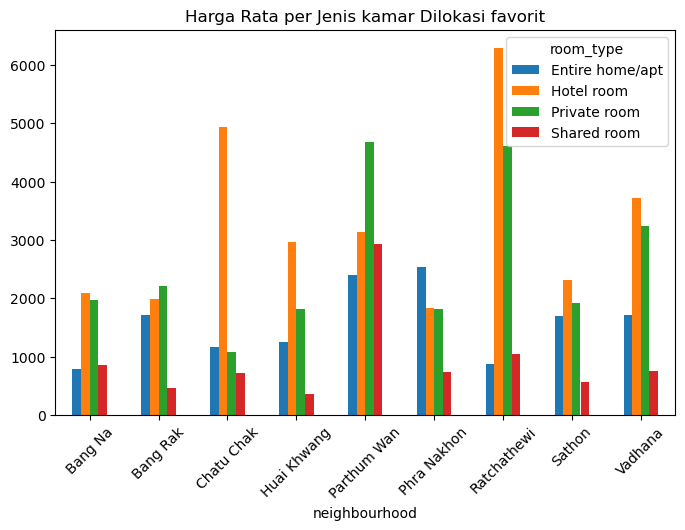

In [155]:
crosstab_result.plot(kind='bar',figsize=(8,5),  
title='Harga Rata per Jenis kamar Dilokasi favorit')
plt.xticks(rotation=45)
plt.show()

Dari hasil diatas didapat kisaran harga rata2 pada setiap jenis kamar di 10 lokasi yang paling banyak diminati pengunjung.

# REKOMENDASI

* Untuk lokasi pembangunan penginapan, Dapat mempertimbangkan memilih dari 10 kota yang paling banyak pengunjung sepanjang tahunnya 1.Huai Khwang, 2 Vadhana 33.Khlong Toei
* Untuk jenis kamar yang dibangun sebaiknya  1.Entire Romm/Apt atau 2. Private Room karena paling banyak dicari
* Untuk syarat durasi penyewaan dibuat sekecil seperti 1, 2, 3, 4, 5, 7 sehingga memungkin lebih banyak terjadi transaksi sewa
* Untuk penetapan harga bisa mengacu pada rata2 harga sewa  dilokasi yang dipilih dan jenis ruangan yang akan dibangun.
